# Índice

## 0. Abstract

## 1. Hipótesis

## 2. Preparación de los datos
- 2.1 Extracción de los datos
- 2.2 Limpieza de datos.

## 3. Feature Engineering

## 4. Análisis exploratorio de datos

## 5. Selección de características
- 5.1 PCA
- 5.2 Backward Selection

## 6. Modelo Machine Learning
- 6.1 Random Forest
- 6.2 Logistic Regression
- 6.3 K Nearest Neighbours

## 7. Selección de Hiperparámetros

## 8. Cross Validation - K Fold

## 9. Insights

# 0. Abstract
Este dataset contiene datos de estudiantes, algunos personales, y otros académicos. A partir de estos datos, analizaré qué aspectos son los más relevantes a la hora de poder predecir qué alumnos son los que tienen más chances de abandonar sus estudios. La información presentada y los insights extraídos serán de utilidad para cualquiera que quiera conocer su situación, o para cualquier establecimiento que pretenda crear algún plan de ayuda a algunos sectores para disminuir los abandonos de estudios. Está claro que los estudios son una parte importante de la formación profesional de los ciudadanos, así que su efecto en el mundo es definitivamente importante. Además de esto, los recursos de cualquier institución, por ejemplo una escuela, son limitados y no se pueden destinar a todos. Es por eso que es necesario algún tipo de análisis que logre reducir las áreas en las que se debe invertir para obtener los mejores resultados posibles.

# 1. Hipótesis
- ¿Entrar con una beca motiva al estudiante?

- ¿No pagar la matrícula lleva al abandono?

- ¿Tener un bajo promedio desmotiva al estudiante?

- ¿Hay diferencia entre rendimiento según rango etario?

- ¿Factores como inflación o desempleo afectan en alguna medida?

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import ConfusionMatrixDisplay
sns.set_style('whitegrid')

# 2. Preparación de datos
## 2.1 Extracción de datos

In [3]:
df_completo = pd.read_csv('dropout.csv', sep=';')
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
# Información sobre el dataset: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [4]:
df = df_completo.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## 2.2 Limpieza de datos

In [6]:
# Convertir la columna Target a numérico

# Crear un diccionario de mapeo de valores
target_mapping = {'Dropout': 1, 'Graduate': 0, 'Enrolled': 2}

# Crear una nueva columna con los valores mapeados
df['Target'] = df['Target'].map(target_mapping)

In [7]:
# Correlación entre variables. No hay correlación perfecta por fuera de la diagonal central

df.corr()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,0.037198
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,0.152623
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,-0.080020
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,-0.017922
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,-0.027193
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,0.039999
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,-0.098462
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,0.019229
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.

In [8]:
# Serie con promedio de primer y segundo semestre, y otra con la columna target
promedio = (pd.Series(df['Curricular units 1st sem (grade)']) + pd.Series(df['Curricular units 2nd sem (grade)'])) / 2
resultado = pd.Series(df['Target'])

#Inicialización de variables
indice = 0
outlier_indices = []

# Promedio 0 y graduado debería ser outlier
for i, x in zip(promedio, resultado):
  if i < 1 and x < 1:
    outlier_indices.append(indice)
  indice = indice + 1


# Dropeo los índices de outliers
df = df.drop(outlier_indices)

In [9]:
df = df[df['Target'] != 2] # Los estudiantes que aun estudian ('Enrolled') no los tomaré en cuenta para el análisis, ya que les faltan datos.

In [10]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


# 3. Feature Engineering

In [11]:
# Cantidad de estudiantes en cada curso

course_count = pd.Series(df['Course'].value_counts())
course_count

9500    666
9238    313
9773    297
9147    272
9085    262
9670    220
9991    214
9254    211
8014    194
9070    184
9003    173
9853    142
9130    120
9119    106
171     103
9556     69
33        9
Name: Course, dtype: int64

In [12]:
# Promedio de abandono de cada curso

for i in range(0,17):
  print(df[df['Course'] == course_count.index[i]]['Target'].describe().loc['mean'])

0.17717717717717718
0.20766773162939298
0.3400673400673401
0.49264705882352944
0.3435114503816794
0.4318181818181818
0.6355140186915887
0.4549763033175355
0.36597938144329895
0.27717391304347827
0.49710982658959535
0.5985915492957746
0.65
0.8679245283018868
0.7961165048543689
0.4782608695652174
0.8888888888888888


In [13]:
# Columna de eficiencia del curso. Cursos con menor porcentaje de abandonos reciben el 0, el mayor es 2.

# Definir la función para asignar valores a la nueva columna
def asignar_valor(row):
    if row['Course'] in [9500, 9238, 9070]:
        return 0
    elif row['Course'] in [9085, 9773, 8014]:
        return 1
    else:
        return 2

# Crear la nueva columna utilizando la función apply
df['Course Efficiency'] = df.apply(asignar_valor, axis=1)

# Mostrar el DataFrame con la nueva columna
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Course Efficiency
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1,2
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,2
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,1


In [14]:
# Promedio de abandono por cantidad de créditos.
# A partir de 14 unidades con créditos en el primer semestre y 12 en el segundo, el abandono baja mucho más.

for i in range(1,18):
    print(df[df['Curricular units 1st sem (credited)'] > i]['Target'].describe().loc['mean'])

print()

for i in range(1,16):
    print(df[df['Curricular units 2nd sem (credited)'] > i]['Target'].describe().loc['mean'])

0.36319612590799033
0.32748538011695905
0.3192982456140351
0.2768595041322314
0.2890995260663507
0.27976190476190477
0.2773722627737226
0.3
0.313953488372093
0.2777777777777778
0.26785714285714285
0.28888888888888886
0.24242424242424243
0.10526315789473684
0.07142857142857142
0.09090909090909091
0.125

0.3287671232876712
0.3157894736842105
0.2979591836734694
0.29347826086956524
0.24390243902439024
0.2727272727272727
0.27586206896551724
0.2597402597402597
0.25
0.22641509433962265
0.30303030303030304
0.15
0.09090909090909091
0.14285714285714285
0.2


In [15]:
# Columnas para gran cantidad de unidades con créditos de los alumnos
df['High 1st sem credit score'] = (df['Curricular units 1st sem (credited)'] >= 14).astype(int)
df['High 2nd sem credit score'] = (df['Curricular units 2nd sem (credited)'] >= 12).astype(int)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Course Efficiency,High 1st sem credit score,High 2nd sem credit score
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,1,2,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0,2,0,0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,1,0,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0,1,0,0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0,1,0,0


# 4. Análisis Exploratorio de Datos

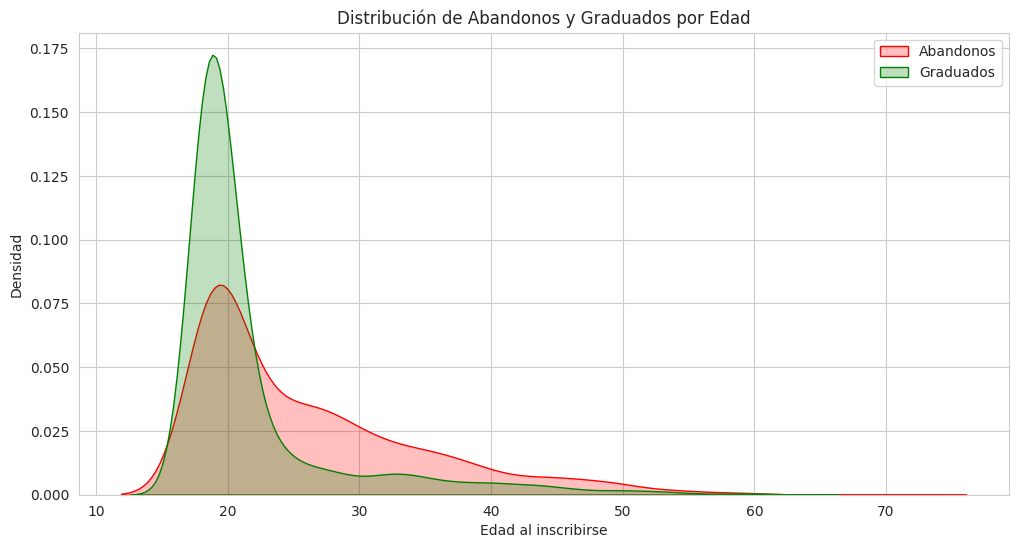

In [16]:
# Dimensiones del gráfico
plt.figure(figsize=(12, 6))

# Filtra los datos para obtener solo abandonos
df_abandonos = df[df['Target'] == 1]

# Filtra los datos para obtener solo graduados
df_graduados = df[df['Target'] == 0]

# Distribuciones
sns.kdeplot(data=df_abandonos, x='Age at enrollment', label='Abandonos', color='red', fill=True)
sns.kdeplot(data=df_graduados, x='Age at enrollment', label='Graduados', color='green', fill=True)

# Títulos y etiquetas
plt.title('Distribución de Abandonos y Graduados por Edad')
plt.xlabel('Edad al inscribirse')
plt.ylabel('Densidad')

# Leyenda
plt.legend()

# Mostrar el ráfico
plt.show()

##### A medida que se aumeta la edad con la que ingresa, el ratio de abandonos va superando al de graduados. A partir de 21-22 lo supera, sigue creciendo la diferencia hasta los 30 y luego va decreciendo hasta llegar a un ratio 33(Gr)/66(Ab). Los estudiantes de 18 a 21 que ingresan por otro lado tienen el mismo ratio final pero invertido 33(Ab)/66(Gr).

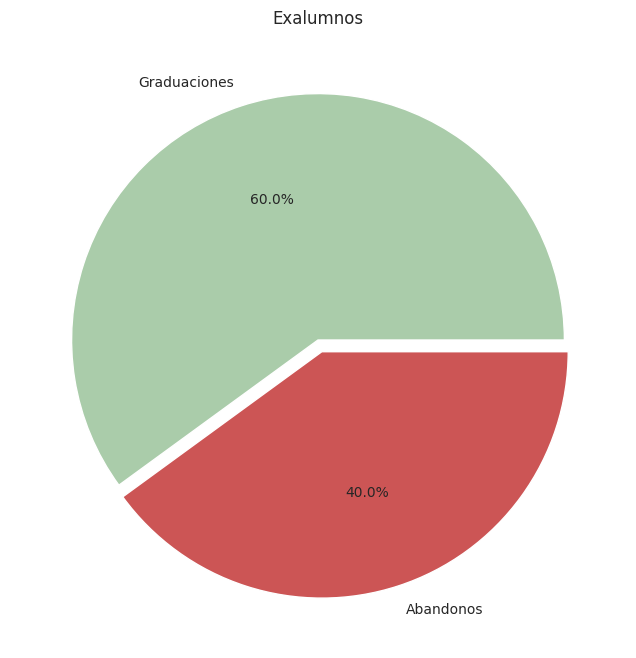

In [17]:
# Definir colores
colores = ['#aaccaa', '#cc5555']

# Contar la frecuencia de cada categoría
conteo_categorias = df['Target'].value_counts()

# Dimensiones del gráfico
plt.figure(figsize=(8, 8))

# Gráfico de torta
plt.pie(conteo_categorias, labels=['Graduaciones', 'Abandonos'], autopct='%1.1f%%', colors=colores, wedgeprops=dict(width=1), explode=(0, 0.05))

# Título
plt.title('Exalumnos')

# Mostrar el gráfico
plt.show()

<ipython-input-18-fa4c7d1d2509>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Becado', 'Becado'])


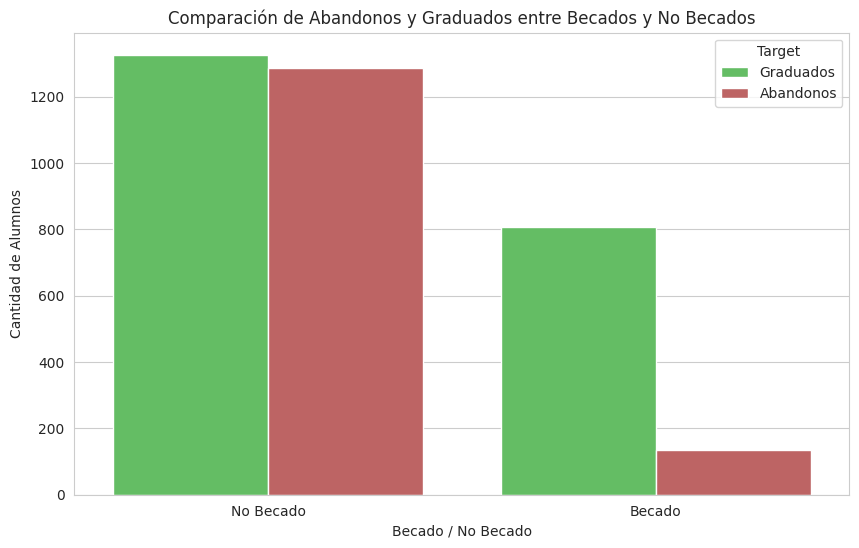

In [18]:
# Dimensiones del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras
ax = sns.countplot(x='Scholarship holder', hue='Target', data=df, palette=['#55cc55', '#cc5555'])

# Títulos y etiquetas
plt.title('Comparación de Abandonos y Graduados entre Becados y No Becados')
plt.xlabel('Becado / No Becado')
plt.ylabel('Cantidad de Alumnos')
ax.set_xticklabels(['No Becado', 'Becado'])

# Leyenda
plt.legend(title='Target', labels=['Graduados', 'Abandonos'])

# Mostrar el gráfico
plt.show()

##### Solo entre estudiantes no becados, el porcentaje de abadono ronda el 50%

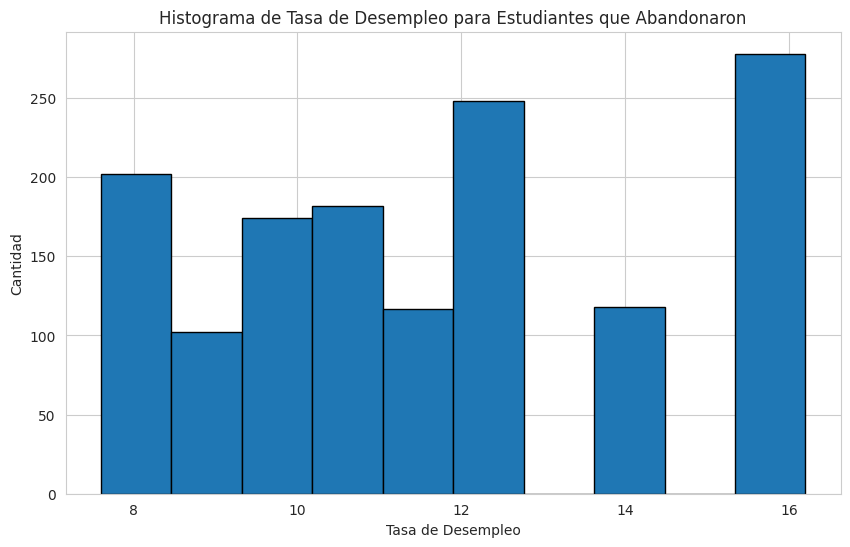

In [19]:
# Filtrar el DataFrame para obtener solo las filas con "Target" igual a "Dropout"
dropout_data = df[df['Target'] == 1]

# Crear el histograma con 10 barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.hist(dropout_data['Unemployment rate'], bins=10, edgecolor='k')

# Títulos y etiquetas
plt.xlabel("Tasa de Desempleo")
plt.ylabel("Cantidad")
plt.title("Histograma de Tasa de Desempleo para Estudiantes que Abandonaron")

# Mostrar el gráfico
plt.show()

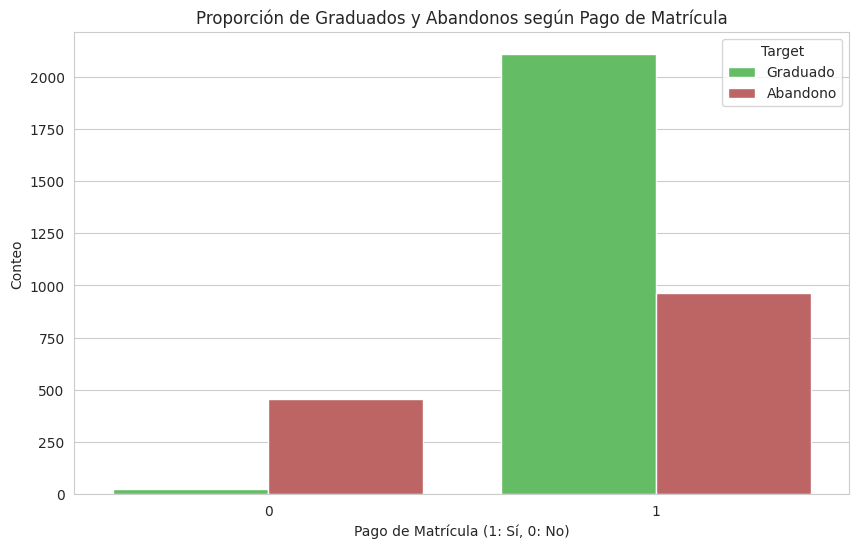

In [20]:
# Dimensiones del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico
sns.countplot(x='Tuition fees up to date', hue='Target', data=df, palette=['#55cc55', '#cc5555'])

# Título y etiquetas
plt.xlabel('Pago de Matrícula (1: Sí, 0: No)')
plt.ylabel('Conteo')
plt.title('Proporción de Graduados y Abandonos según Pago de Matrícula')

# Leyenda
plt.legend(title='Target', labels=['Graduado', 'Abandono'])

# Mostrar el gráfico
plt.show()

##### Sin tener en cuenta a los que no pagan su matrícula, el porcetaje de abandonos baja de un 40% a un 33%.

#  5. Selección de características
## 5.1 PCA

In [21]:
# Dividir el dataframe reducido en matriz y objetivo
X = df.drop("Target", 1)
y = df['Target']

<ipython-input-21-066e45752a92>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Target", 1)


In [22]:
# Escalar los datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializar el objeto PCA
pca = PCA(n_components=3)

# Aplicar PCA a los datos escalados
X_pca = pca.fit_transform(X_scaled)

# Obtener el número de componentes seleccionados
num_components = pca.n_components_

# Crear un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=X.columns[:num_components])

# Añadir la variable objetivo al nuevo DataFrame
df_pca['Target'] = y

# Mostrar el nuevo DataFrame con los componentes principales
df_pca.head()

,Marital status,Application mode,Application order,Target
0,-5.631817,0.555013,3.158300,1.0
1,-0.423729,-0.853297,1.542744,0.0
2,-3.668364,0.458990,1.615363,1.0
3,0.197051,-1.013573,-0.609540,0.0
4,0.016875,2.281320,-2.817935,0.0


Proporción de varianza explicada:  [0.17440097 0.10343788 0.05585839]


<function matplotlib.pyplot.show(close=None, block=None)>

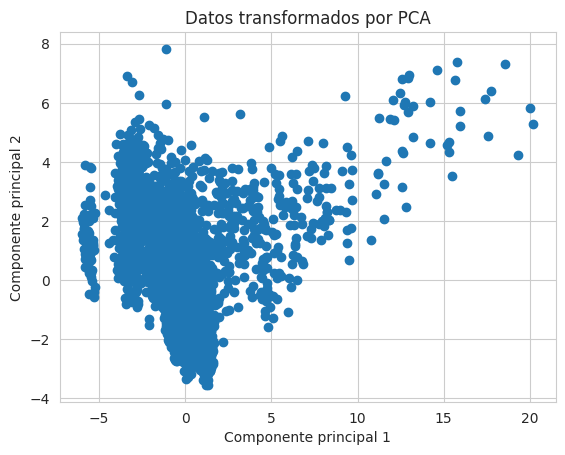

In [25]:
# Gráfico de varianza explicada con los primeros 2 componentes principales

explained_variance_ratio = pca.explained_variance_ratio_
print("Proporción de varianza explicada: ", explained_variance_ratio)

# Crear gráfico y etiquetas
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Datos transformados por PCA')
plt.show

# 5.2 Backward Selection

In [26]:
def backward_selection(data, target,significance_level = 0.2):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [27]:
backward_selection(X,y)

['Application mode',
 'Application order',
 'Course',
 'Previous qualification',
 'Nacionality',
 "Father's qualification",
 "Mother's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'GDP',
 'Course Efficiency',
 'High 1st sem credit score']

# 6. Modelo de Machine Learning
## 6.1 Random Forest

In [28]:
# Separar en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=130)

# Modelo Random Forest
model = RandomForestClassifier(random_state=130)
model.fit(X_train, y_train)

# Predicciones del modelo con X_test
rforest_preds = model.predict(X_test)

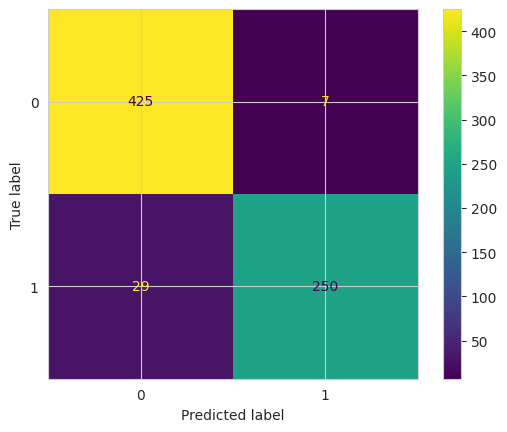

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, rforest_preds)
plt.show()

In [32]:
# Accuracy
rforest_accuracy = metrics.accuracy_score(y_test, rforest_preds)
print(f'Precisión del modelo Random Forest: {rforest_accuracy}')

 # Spearman R
from scipy.stats import spearmanr
corr, _ = spearmanr(y_test, rforest_preds)
print('Correlación Spearman: {%.3f}' % corr)

Precisión del modelo Random Forest: 0.9493670886075949
Correlación Spearman: {0.894}


# 6.2 Logistic Regression

In [33]:
# Modelo de Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_model = LogisticRegression(random_state=130)
logistic_model.fit(X_train_scaled, y_train)

# Predicciones con el modelo con X_test
logistic_preds = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


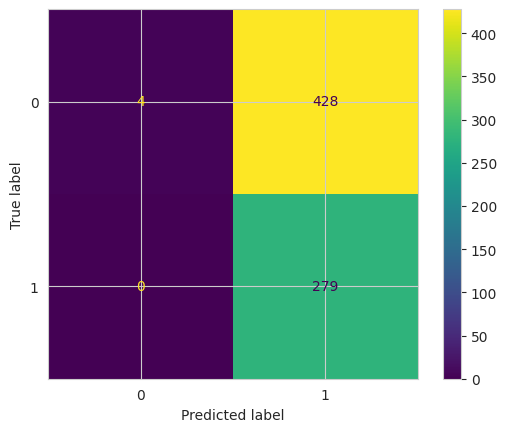

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, logistic_preds)
plt.show()

In [35]:
# Accuracy
logistic_accuracy = metrics.accuracy_score(y_test, logistic_preds)
print("Precisión del modelo de Regresión Logística:", logistic_accuracy)

# Spearman R
corr, _ = spearmanr(y_test, logistic_preds)
print('Correlación Spearman: {%.3f}' % corr)

Precisión del modelo de Regresión Logística: 0.3980309423347398
Correlación Spearman: {0.060}


##### El modelo de regresión logística definitivamente presenta un peor resultado que el previamente usado Random Forest. Esto puede ser quizás una situación de underfitting. ya que hay demasiadas características sin una relación muy marcada con el target, por lo que crear relaciones lineales no es buena idea.

# 4.3 K Nearest Neighbours

In [36]:
# Modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predicciones del modelo con X_test
knn_preds = model.predict(X_test)

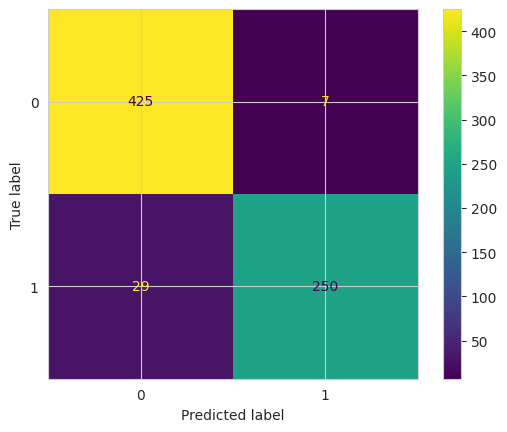

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_preds)
plt.show()

In [38]:
# Accuracy
knn_accuracy = metrics.accuracy_score(y_test, knn_preds)
print("Precisión del modelo de KNN:", knn_accuracy)

# Spearman R
corr, _ = spearmanr(y_test, knn_preds)
print('Correlación Spearman: {%.3f}' % corr)

# Precision para cada categoría
precision_positiva = metrics.precision_score(y_test, knn_preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, knn_preds, pos_label=0)
print(f"Precisión +: {precision_positiva}\nPrecisión -:{precision_negativa}")

# Recall para cada categoría
recall_sensibilidad = metrics.recall_score(y_test, knn_preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, knn_preds, pos_label=0)
print(f"Recall +: {recall_sensibilidad}\nRecall -:{recall_especificidad}")

# F1-score para cada categoría
f1_positivo = metrics.f1_score(y_test, knn_preds, pos_label=1)
f1_negativo = metrics.f1_score(y_test, knn_preds, pos_label=0)
print(f"F1-Score +:{f1_positivo}\nF1-Score -:{f1_negativo}")

Precisión del modelo de KNN: 0.9493670886075949
Correlación Spearman: {0.894}
Precisión +: 0.9727626459143969
Precisión -:0.9361233480176211
Recall +: 0.8960573476702509
Recall -:0.9837962962962963
F1-Score +:0.9328358208955224
F1-Score -:0.9593679458239277


##### Parece que ambos modelos, Random Forest y KNN están aprendiendo de manera idéntica. Ambos modelos analizan características no lineales, por lo que quizás tenga sentido que sus resultados sean similares. De todas formas, su igualdad es tal vez una alerta de alguna falta de ajuste para cada modelo en particular.

In [39]:
# Aplicar el modelo KNN a los datos pasados por el proceso de PCA

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=97)

# Modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train_pca)

# Predicciones del modelo con X_test_pca
knn_preds_pca = knn_model.predict(X_test_pca)

# Calcular la precisión del modelo
knn_accuracy_pca = metrics.accuracy_score(y_test_pca, knn_preds_pca)
print("Precisión del modelo de KNN:", knn_accuracy_pca)

Precisión del modelo de KNN: 0.8551336146272855


##### Nuevamente, el rendimiento resulta peor que en el primer intento. Esto puede deberse por un lado a que PCA es un proceso que asume la linealidad en los datos. Como sucedió con la regresión logística, muchas veces en el conjunto de datos extraído esto no se da. Por otro lado, también puede ser por no estar utilizando el correco modelo predictivo, o no estar ajustando correctamente los parámetros que entran en el modelo.

In [40]:
# Aplicar el modelo KNN a los datos pasados por el proceso de Backward Selection

# Obtener las mejores características seleccionadas mediante backward selection
selected_feature_indices = backward_selection(X, y)

# Extraer las características seleccionadas del conjunto de datos original X
X_bs = X.loc[:, selected_feature_indices]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_bs, X_test_bs, y_train_bs, y_test_bs = train_test_split(X_bs, y, test_size=0.2, random_state=90)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bs)
X_test_scaled = scaler.transform(X_test_bs)

# Modelo K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train_bs)

# Predicciones del modelo con X_test
knn_preds_bs = knn_model.predict(X_test_scaled)

# Calcular la precisión del modelo
knn_accuracy = metrics.accuracy_score(y_test_bs, knn_preds_bs)
print("Precisión del modelo de KNN:", knn_accuracy)

Precisión del modelo de KNN: 0.909985935302391


##### En este caso, nuevamente, la precisión del modelo resulta peor que cuando utilicé todas las características. Al reducir la dimensionalidad de los datos, se pierde una gran cantidad que podría ser util, ya sea por su relevancia directa con la columna target, o con relaciones entre otras características.

# 7. Selección de Hiperparámetros

In [41]:
# Definir el modelo (Random Forest en este caso)
model = RandomForestClassifier()

# Dividir el dataframe reducido en matriz y objetivo
X = df.drop("Target", 1)
y = df['Target']

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=130)

# Definir la cuadrícula de parámetros a buscar
params_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializar el objeto RandomizedSearchCV
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)

# Realizar la búsqueda de hiperparámetros en el conjunto de datos
grid_cv.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores parametros:", grid_cv.best_params_)

# Mostrar el mejor score de validación cruzada
print("Mejor score de CV:", grid_cv.best_score_)

# Calcular y mostrar la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, grid_cv.predict(X_test))
print(f'Accuracy del modelo en el conjunto de prueba: {round(accuracy, 5)}')

<ipython-input-41-0ad894f53e83>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("Target", 1)


Mejores parametros: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Mejor score de CV: 0.9138537271448665
Accuracy del modelo en el conjunto de prueba: 0.94655


# 8. Cross Validation K Fold

In [42]:
# Definir el número de divisiones para la validación cruzada k-fold
k = 8

# Inicializar el modelo con los mejores hiperparámetros encontrados
best_model = RandomForestClassifier(**grid_cv.best_params_)

# Definir el esquema de validación cruzada k-fold
kf = KFold(n_splits=k, shuffle=True, random_state=130)

# Realizar la validación cruzada k-fold
cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print("Resultados de la validación cruzada k-fold:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score}")

# Calcular y mostrar la precisión promedio de la validación cruzada
average_accuracy = cv_scores.mean()
print(f"Precisión promedio de la validación cruzada k-fold: {average_accuracy}")


Resultados de la validación cruzada k-fold:
Fold 1: 0.9370786516853933
Fold 2: 0.9415730337078652
Fold 3: 0.9168539325842696
Fold 4: 0.8918918918918919
Fold 5: 0.918918918918919
Fold 6: 0.9099099099099099
Fold 7: 0.9211711711711712
Fold 8: 0.8963963963963963
Precisión promedio de la validación cruzada k-fold: 0.916724238283227


# 8. Insights
### A partir de lo extraído del EDA:

- Casi todos los alumnos becados llegan a graduarse, por lo que no son un problema
- Cuanto mayores son los alumnos al ingresar, más porcentaje de abandonos hay
- Tasas de inflación y desempleo no afectan al rendimiento académico
- Casi todos los alumnos con la Tasa de Matrícula sin pagar abandonan sus estudios

### Los Modelos Random Forest Classifier y KNN son los que mejor se adaptan a los datos de este proyecto. Ambos tienen un acuraccy de ~91%.
